In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
dt = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [3]:
dt.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
dt.shape

(5000, 14)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
dt.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
x = dt.drop(['Personal Loan'],axis = 1)
y = dt['Personal Loan']

In [9]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x, y, test_size=0.3, random_state = 42)

In [10]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)

In [11]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
for feature, imp in zip(train_x.columns, rf.feature_importances_):
    print(f"{feature} {imp}")

ID 0.049952990170965904
Age 0.042545171972949804
Experience 0.04300303307092084
Income 0.3113538410724781
ZIP Code 0.04477525821402896
Family 0.08296112479566545
CCAvg 0.16579938038093608
Education 0.13547020437273793
Mortgage 0.049660305324644605
Securities Account 0.005736316147878868
CD Account 0.050281207355037674
Online 0.008641290481527522
CreditCard 0.009819876640228178


In [13]:
features = []
for feature, imp in zip(train_x.columns, rf.feature_importances_):
    if imp >= 0.05:
        features.append(feature)

In [14]:
features

['Income', 'Family', 'CCAvg', 'Education', 'CD Account']

In [15]:
tree_model = DecisionTreeClassifier(random_state=101)
tree_model.fit(train_x[features], train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [16]:
tree_model.score(train_x[features], train_y)

0.9997142857142857

In [17]:
tree_model.score(test_x[features], test_y)

0.982

In [18]:
with open("Loan_tree.dot",'w') as f:
    f = export_graphviz(tree_model, feature_names=features, out_file=f)

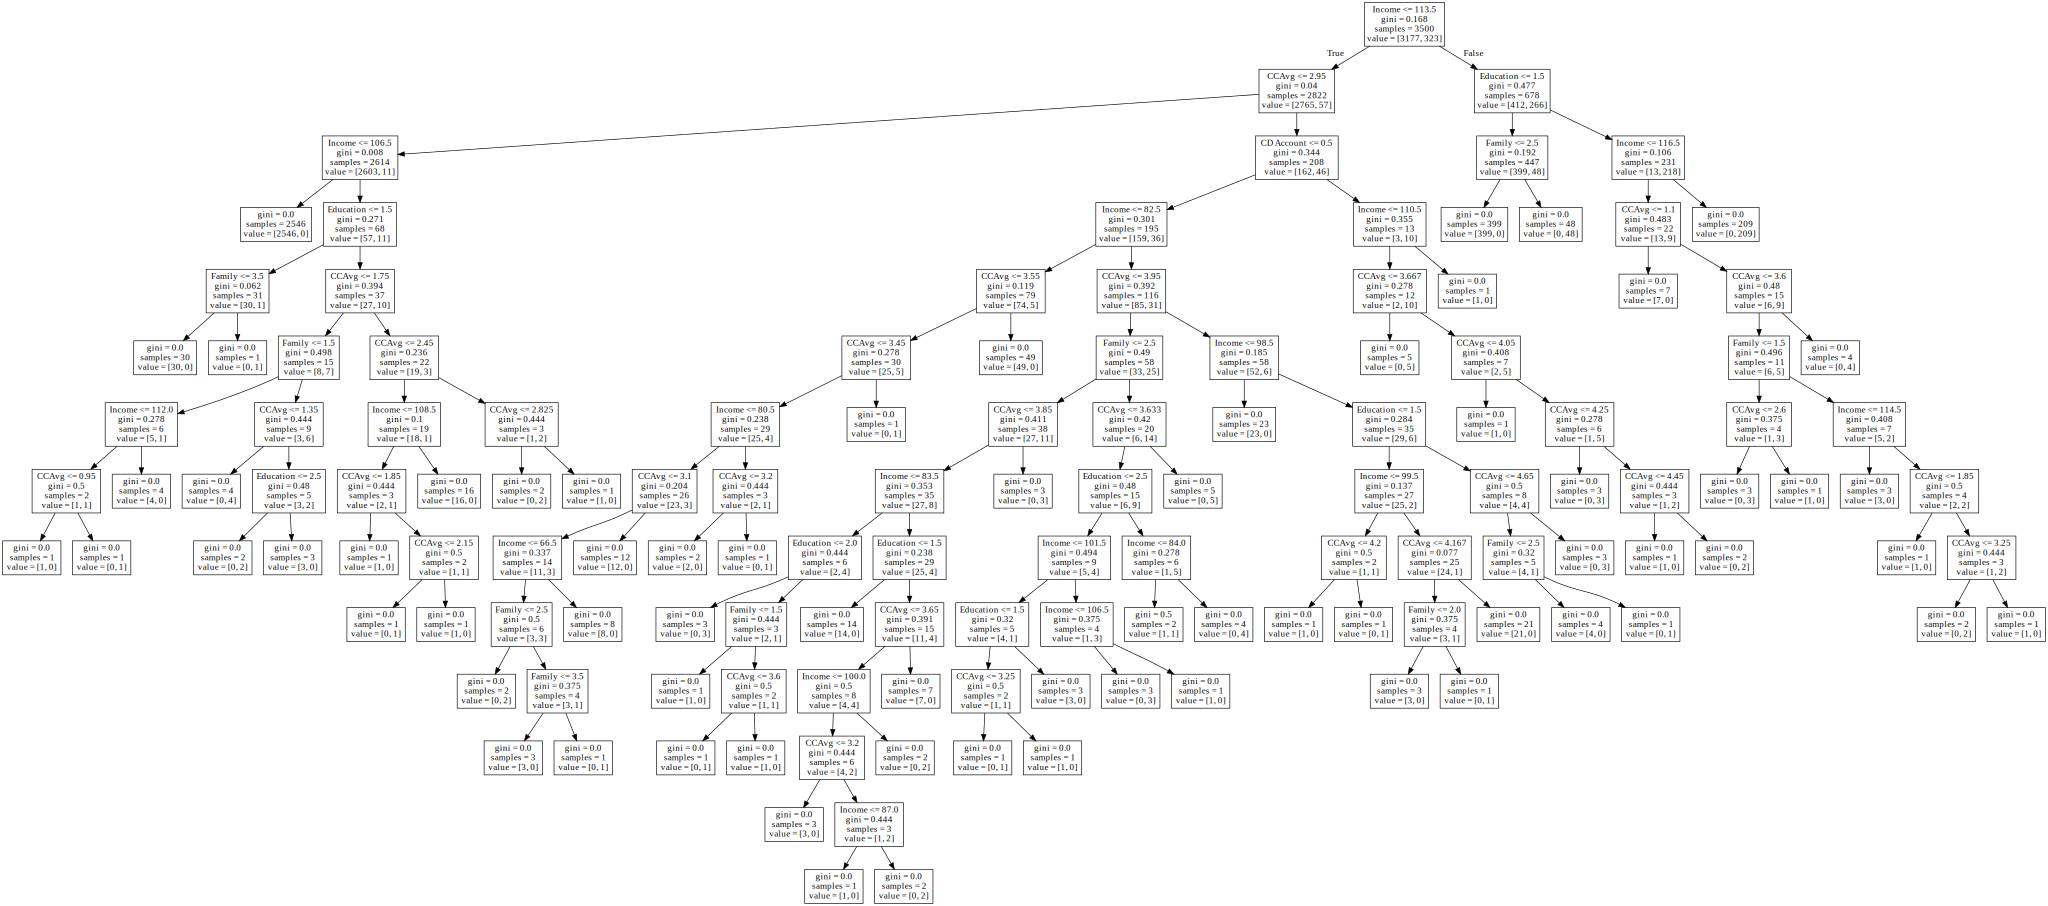

In [19]:
import graphviz
with open("Loan_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)